<h1>Machine Learning en Python</h1>

### Repaso de Tensores:

Aunque no hayamos visto la definición de "tensores" en el curso, si que hemos trabajado con ellos haciendo referecia a ellos como arrays o arreglos.

## Representaciones de datos en NN:

En el ejemplo que vimos de numpy, partimos de datos almacenados en arreglos multidimensionales de `numpy`, los cuales se conocen con el nombre de *tensores*. En general, todos los algoritmos de ML usan tensores como estructura base de los datos, siendo un campo fundamental de éstos. 

En esencia, un tensor es un contenedor de datos, casi siempre datos numéricos. Por ejemplo, estamos familiarizados con las matrices, que son tensores 2D: los tensores son una generalización de matrices a un número arbitrario de dimensiones (a una dimensión a menudo se denomina eje). 

## Escalares (Tensores 0D)

Un tensor que contiene un solo número se le llama escalar, tensor escalar, tensor 0-dimensional ó 0D tensor. En `numpy` se tiene:

- float32 o float64.
- int 32 o int 64.

Recordemos

In [2]:
# Array 
import numpy as np

x0 = np.array(12)
x0

array(12)

# Vectores (Tensores 1D)

A un array de número se le llama vector, o tensor 1D. Decimo entonces que un tensor 1D tiene exactamente 1 eje. 

En `numpy` lo definimos como:

In [3]:
x1 = np.array([12, 3, 6, 14, 5])
x1

array([12,  3,  6, 14,  5])

In [4]:
x1.ndim

1

El anterior vector tiene 5 entradas, por lo tanto es llamado *vector 5-dimensional*. La *dimensionalidad* puede denotar, tanto el numero de entradas a lo larco de un eje específico, o el número de ejes en un tensor.  En el caso anterior, y para evitar confusiones con los tensor 5D, es mejor referirnos éste como *tensor de rango 5*. 

## Matrices (Tensores 2D)

Un arreglo de vectores es una matriz, un tensor 2D. Una matriz tiene dos ejes, a los cuales nos referimos comúnmente como filas y columnas. Una matriz representa, visualmente, una malla rectancular de números.

En numpy se define como:

In [61]:
x2 = np.array([[5, 78, 2, 34, 0],
[6, 79, 3, 35, 1],
[7, 80, 4, 36, 2]])
x2.ndim

2

Recordemos que a las entradas del primer eje se le llaman filas y las entradas del segundo eje, columnas. 

## Tensores 3D y tensores de dimensión mayor:

Si agrupamos matríces de dimensiones iguales hablamos de un tensor 3D, que puede interpretarse, visualmente como un cubo de numeros. 

En numpy se define como:

In [62]:
x3 = np.array([[[5, 78, 2, 34, 0],
[6, 79, 3, 35, 1],
[7, 80, 4, 36, 2]],
[[5, 78, 2, 34, 0],
[6, 79, 3, 35, 1],
[7, 80, 4, 36, 2]],
[[5, 78, 2, 34, 0],
[6, 79, 3, 35, 1],
[7, 80, 4, 36, 2]]])

x3.ndim

3

Al agrupar tensores 3D en una arreglo, podemos crear tensores 4D, y así sucesivamente. En deep learning se trabajará con tensores de rango 0 a 4, y en caso como el procesamiento de videos, puede llegarse a tensores de rango 5.

### Atributos claves:
 Un tensor se encuentra determinado por tres atributos:

 * *Numero de ejes*: (rango): `ndim`.
 * *Forma*: que en python es una tupla de enteros que describe cuantas dimensiones tienen el tensor a lo largo de cada eje.  A este atributo se accede mediante `shape`.
 * *Data type*: Corresponde a los tipos de datos que contiene el tensor y se accede a mediante el atributo `dtype`.

In [63]:
print("Dimensión:", x3.ndim)
print("Forma", x3.shape)
print("Tipo de datos: ", x3.dtype)

Dimensión: 3
Forma (3, 3, 5)
Tipo de datos:  int64


Veamos un ejemplo concreto de una base de datos MNIST de `keras`:

In [9]:
from keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [10]:
print(train_images.ndim)

3


In [11]:
print(train_images.shape)

(60000, 28, 28)


In [12]:
print(train_images.dtype)

uint8


A continuación se resume la característica del dataset:

* Tensor 3D
* Tipos de datos: enteros de 8-bits.  

Visualicemos una imágen:

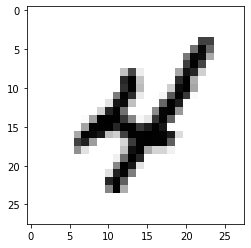

In [13]:
digit = train_images[9]
import matplotlib.pyplot as plt
plt.imshow(digit, cmap=plt.cm.binary)
plt.show()

##Manipulación de tensores en Numpy:

En el ejemplo anterior se seleccionó un digito específico junto al primer eje usando la sintaxis train_images [i]. La selección de elementos específicos en un tensor se denomina corte de "tensor slicing". Veamos las operaciones de "tensor slicing" que puede hacerse con los arreglos de `numpy`.

Para selecionar los digitos de 10 a 100 (si incluir el 100) hacemos:


In [64]:
my_slice = train_images[10:100]
print(my_slice.shape)

(90, 28, 28)


La anterior operación es equivalente a la selección de todas las dimensiones de los ejes mediante : 

In [65]:
my_slice = train_images[10:100, :, :]
my_slice.shape

(90, 28, 28)

Y lo anterior es equivalenta a

In [16]:
my_slice = train_images[10:100, 0:28, 0:28]
my_slice.shape

(90, 28, 28)

De forma general, podemos seleccionar entre dos índices cualquiera a lo largo de un eje del tensor.

## Problema:

Dentro del conjunto de datos, seleccióne la esquina inferior que contenga $14\times14$ píxeles en cada una de las imágenes y visualice una de ellas. 

In [17]:
my_slice2 = train_images[10:100, 0:14, 0:14]
my_slice2.shape

(90, 14, 14)

Haga click **aquí** si tiene problemas con la solución.

<!----:
# solución:
my_slice_corner = train_images[:, 14:, 14:]

digit = my_slice_corner[3]
import matplotlib.pyplot as plt
plt.imshow(digit, cmap=plt.cm.binary)
plt.show()

----->

Recordemos que también es posible usar índices negativos. Los índices negativos indican una posición relativa al final del eje en cuestión. Recorte, por ejemplo, las imagenes anteriores para que queden centradas en matríces de 14x14.

Haga click **aquí** si tiene problemas con la solución:

<!-----
my_crop_slices_centered = train_images[:, 7:-7, 7:-7]

digit = my_crop_slices_centered[0]
import matplotlib.pyplot as plt
plt.imshow(digit, cmap=plt.cm.binary)
plt.show()
----->

## Noción de batches

En general, el primer eje (eje 0, ya que la indexación comienza en 0) de todos los  tensores de datos que encontremos en DL será el eje de muestras (a veces denominado dimensión de muestras). En el ejemplo MNIST, las muestras son imágenes de dígitos.

Además, los modelos de DL no procesan un conjunto de datos completo a la vez; en su lugar, dividen los datos en pequeños lotes. Por ejemplo:

In [66]:
batch1 = train_images[:128]
batch2 = train_images[128:256]

El n-ésimo batch sería:

$$\text{batch} = \text{train_images}[128 * n:128 * (n + 1)]$$

Cuando considere un tensor batch, el primer eje (eje 0) es conocido como la dimensión del batch. Este término es comun mente usado en Keras y otras librerías de DL.

## Ejemplo reales de tensores:

* *Vector de datos:* Tensor 2D de forma `(samples,features)`.

* *Datos de series de tiempos o secuencias:* Tensor 3D de forma `(samples, timesteps, features)`.

* *Imágenes:* Tensores 4D de forma `(samples,height,width,channels)` o `(samples,channels,height,width)`.

* *Videos:* Tensores 5D de forma `(samples,frames, height,width,channels)` o `(samples, height,frames,channels,height,width)`. 

# Repaso de Funciones y Clases

<p><a name="funci"></a></p>

## Funciones

Una función es un bloque de código organizado y reutilizable que se utiliza para realizar una única acción relacionada. Las funciones proporcionan una mejor modularidad para su aplicación y un alto grado de reutilización de código.

>`def Nombre(arg1,arg2,...):`
>> `sentencias`

Definamos la función exponencial $a^b$

In [19]:
def Exp(a,b):
  exp = a**b
  print(exp)
  return
  
Exp(2,2)  

4


La sentencia *return* termina la función,  devolviendo opcionalmente uno o varios valores. Una declaración de retorno sin argumentos es lo mismo que devolver *none* (como en el caso anterior)

In [20]:
def Exp(a,b):
  return a**b
  
def Exp2(a,b):
  return a**b,a**b+1,a**b+2

print(Exp(2,2),type(Exp(2,2)))

print(Exp2(2,2),type(Exp2(2,2)))


4 <class 'int'>
(4, 5, 6) <class 'tuple'>


## Problema:

Escriba un código en Python que devuelva el máximo valor de un vector.

In [21]:
def mayor(vecIn):
  max=vecIn[0]
  for i in vecIn:
    max=i if i>max else max
  return max
  # return np.array(vecIn).max()

In [22]:
mayor([1,5,4,9,8,3,4,5,78]) 

78

Haga click en **esta** celda si tiene problemas con la solución.

<!---:

def max_array1D(arr): 
  
    # Initialize maximum element 
    max = arr[0] 
  
    # Traverse array elements from second 
    # and compare every element with  
    # current max 
    for i in range(1, arr.shape[0]): 
        if arr[i] > max: 
            max = arr[i] 
    return max

---->

<p><a name="class"></a></p>

## Clases/Objetos

Python es un lenguaje orientado a objetos. Casi todo en Python representa un objeto, el cual esta constituidos por sus atributos y métodos. 

Una clase es un "ente creador", o un prototipo para la creación de objetos.

Las clases proporcionan un medio de agrupar datos y "funcionalidad". La creación de una nueva clase crea un nuevo tipo de objeto, lo que permite crear nuevas *instancias* de ese tipo. Cada instancia de la clase puede tener sus propios atributos. Las instancias de una clase también pueden tener *métodos* (definidos por su clase) para modificar su estado.

>class Name():
>>sentencias

Los atributos son como propiedades que queremos añadir a la clase 

In [23]:
class Auto():
  marca = ''
  color = ''

Creemos un objeto de la clase Auto con algunos atributos

In [24]:
Mi_auto = Auto()
Mi_auto.marca = 'ferrari'
Mi_auto.color = 'rojo'

print(Mi_auto.marca)
print(Mi_auto.color)

ferrari
rojo


Dentro de las clases podemos definir funciones, conocidas como *métodos* 

In [25]:
class Persona():
  nombre = ''
  edad = ''
  
  def print_nombre(self):
    print('nombre:',self.nombre)
    
  def print_edad(self):
    print('edad:',self.edad)
    
Person1 = Persona()
Person1.nombre = 'carolina'
Person1.edad = 20

Person1.print_nombre()
Person1.print_edad()

nombre: carolina
edad: 20


Los métodos necesitan tener un argumento convenientemente llamado self, que se refiere al objeto del método que está siendo llamado. Podemos pasar más de un argumento si así lo deseamos

In [26]:
class Persona:
    nombre = ''
    edad = ''
     
    def print_informacion(self, nombre, edad):
        print('nombre:',self.nombre)
        print('edad:',self.edad)
             
Person2 = Persona()
Person2.nombre = 'carlos'
Person2.edad = '30'
Person2.print_informacion(Person2.nombre, Person2.edad)

nombre: carlos
edad: 30


La operación de creación de instancias crea un objeto vacío. A muchas clases les gusta crear objetos con instancias personalizadas a un estado inicial específico. Por lo tanto, una clase puede definir un método especial llamado __init __ (), como este:

In [27]:
class Person:
  def __init__(self,n,e):
    self.nombre = n
    self.edad = e
  def __str__(self):
    return self.nombre
      
Person3 = Person('mario','55')
print('nombre:',Person3.nombre)
print('edad:',Person3.edad)    
print(Person3)

nombre: mario
edad: 55
mario


## Problema

Creen una clase `Point` en coordenadas cartesianas, que se su constructor inicialice el objeto a un punto con unas coordenadas dadas. Además, la clase debe contener dos métodos:

* `translate()`, que reciba como argumentos dos valores arbitrarios $(x,y)$.
* `__str__(self)`: que imprima el punto en precisión de coma flotante.

Haga click en **esta** celda para ver la solución en caso de dificultades.
<!----

class Point:
    """
    Simple class for representing a point in a Cartesian coordinate system.
    """
    
    def __init__(self, x, y):
        """
        Create a new Point at x, y.
        """
        self.x = x
        self.y = y
        
    def translate(self, dx, dy):
        """
        Translate the point by dx and dy in the x and y direction.
        """
        self.x += dx
        self.y += dy
        
    def __str__(self):
        return("Point at [%f, %f]" % (self.x, self.y))

!---->


# Introducción al Deep Learning


## ¿Qué es Deep Learning?

![picture](https://i.imgur.com/BtyLC2y.png)


Como se vió la inteligencia artificial nace a partir de preguntarnos si era posible automatizar máquinas para que realizaran tareas intelectuales normalmente realizadas por humanos. A partir de esto surgen ramificaciones de la IA entre las cuales encontramos el machine learning y a su vez el Deep learning, éste último un subcampo del machine learning.

La **inteligencia artificial** es un concepto donde se utilizan reglas programaticas asi sean harcodeadas que son dificiles de hacer pero faciles de explicar, por ejemplo, calcular una media, es un proceso facil de explicar pero tedioso de hacer una y otra y otra vez

El **machine learning** se utiliza cuando no conozco las reglas y quiero llegar a ellas programaticamente, por ejemplo, tengo la foto de un gato y quiero llegar a las reglas que dicen porque eso es un gato, entonces se añaden un monton de fotos de perros, gatos, etc, se dice que foto corresponde a que animal y se espera que el computador aprenda las reglas por si solo.

El **shallow learning** o el aprendizaje superficial esta entre machine learning y deep learning alli se encuentran las SVM, random forest, decision trees,etc (porque dependen de las variables usadas para crear el modelo... por el otro lado, los DL tienen el potencial de extraer mejores representaciones de los datos crudos para crear mejores modelos...
Finalmente, la ingeniería de variables **feature engineering** , que es algo muy tedioso de hacer, puede incrementar el *performance* de un shallow learner).


El **Deep Learning** es una forma de tratar las representaciones de los datos que pone énfasis en el aprendizaje a traves de capas sucesivas, con lo cual se busca  tener representaciones cada vez mas significativas que nos permitan estar cerca de las salidas esperadas, es decir, a traves de las capaz se busca extraer progresivamente caracteristicas de un valor mas refinado.

![picture](https://i.imgur.com/sOtasrr.png)

Donde por representaciones hacemos referencia a todas esas posibles transformaciones que realizamos a nuestros datos de forma tal que puedan facilitar nuestra tareas.

El número de capaz que contribuyen en un modelo de datos es llamado **depth** (profundidad); en general tenemos cientos de capaz en nuestros modelos, pero hay ciertos casos en los que solo se cuenta con una o dos capaz a esto se le llama **Shallow learning**(Aprendizaje poco profundo). El deep learning también es llamado  **Layered representations Learning** y **Hierarchical representations learning**. En la siguiente imagen podemos ver un esquema de los modelos de deep learning a grandes razgos.

![picture](https://i.imgur.com/318WfrZ.png)


En el Deep Learning el aprendizaje se da a partir de modelos conocidos como redes neuronales artificiales, los cuales son estructuras por capaz conectadas unas a otras, donde el nombre de red neuronal viene de la neurobiología y su comparación con el cerebro, si bien estos modelos se inspiran en este, las redes neurales *no son modelos del cerebro*, pues no se tiene la certeza de como éste funciona, es por esto que muchas personas están dejando a un lado la terminología que hace referencia a aspectos biológicos.

![picture](https://i.imgur.com/uoUu9sE.png)


En la anterior se puede ver un esquema general de una red profunda, la cual podemos pensar como una multiestación de operaciones de destilación de información, donde esta va a traves de diferentes filtros y se retorna altamente purificada, es decir, vamos obteniendo a traves de las capaz diferentes caracterisiticas que harán mas refinadas nuestras representaciones y por ende nos acercaran más a las salidas buscadas.

## ¿Cómo trabaja Deep Learning?

Igual que en machine learning, se tiene un mapeo input-target,esta vez a traves de una secuencia de transformaciones de los datos (capaz), como se puede ver en la siguiente imagen.

![picture](https://i.imgur.com/yLfzLKI.png)

Donde podemos ver que se involucran unos elementos llamados **pesos**, los cuales en esencia son una manada de números que guardan la especificación de qué le hace una capa a sus datos de entrada, es decir, la transformación implementada por una capa es parametrizada por sus pesos. En este sentido se busca encontrar a partir de lo que llamamos aprendizaje el conjunto de valores para los pesos con los cuales  la red mapea correctamente los valores de entrada con sus respectivas etiquetas.

Por lo tanto a mi red neuronal le ingreso los datos de entrada, los cuales pasan a traves de las diferentes capaz realizando esa "destilación" de información y sale mi predicción (salida), donde en nuestra fase de entrenamiento debemos controlar este valor de salida, es decir, necesitamos poder medir que tan lejos nuestra salida está del valor esperado, es aquí donde toma juego la llamada **loss function**(función de perdida) o **Objective function**(funció objetivo); esta toma la predicción y la verdadera etiqueta y calcula cierto puntaje para la distancia entre estas, logrando así capturar que tan bien la red neuronal está haciendo su trabajo.

![picture](https://i.imgur.com/tIWqNoP.png)

Teniendo esto, el objetivo está en ajustar los pesos de forma tal que se disminuya la función de perdida, esto se logra usando un optimizador he implementado el **backpropagation**.

## ¿ Qué hemos alcanzado con Deep Learning?

Con la aplicacion de estos modelos se han alcanzado avances a niveles que muchas veces pueden estar cerca al de un humano; algunos como los siguientes:
* Clasificación de imagenes
* Reconocimiento de voz
* Transcripión de textos
* Mejora en las traducciones automáticas
* Conversión de voz a texto
* Carros autonomos
* Entre otros

A | B
- | - 
![alt](https://i.imgur.com/5p8aMXy.png) | ![alt](https://miro.medium.com/max/1966/1*nJNxFmJaHxyJTtVFkhGTlg.png)

## ¿Qué hace diferente a Deep Learning?

* Ofrece mejores soluciones en algunos problemas
### ESTO ES MUY IMPORTANTE, NO ME TOCA INVENTARME LOS FEATURES (LARGO DEL CEPALO, ETC) **Automatiza el feature engineering**
* Todas las capaz aprenden conjuntamente,esto lo hace paralelizable.

Si bien estas son unas de las características que destacan, existen muchas más que nos permiten que modelos complejos puedan ser abordados con facilidad y mayor velocidad en comparación con hace unos años.


## ¿ Por qué DL ahora?

Si bien las teorías y modelos de DL y en general de la IA se han planteado hace ya un buen tiempo, el rápido crecimiento en los últimos años se ha dado debido a los avances en **hardware** y **Datos**, pues básicamente la IA es un campo experimental mas que teorico, eso no implica que la teoría haya quedado a un lado, pues el avance en capacidad de computo y datos permiten a su vez el avance en nuevos algoritmos. 

# Redes neuronales artificiales

Estas fueron inspiradas en las neuronas biológicas y sus conexiones en el cerebro de los animales, donde estas son celulas nerviosas que proveen unidades funcionales fundamentales para el sistema nervioso de los animales. Las neuronas biológicas se comunican a través de impulsos electro-químicos, llamados señales.Estas están conectadas unas a otras organizadas en redes de millones de nueronas. En la siguiente imagen se pueden ver algunos de los componentes de las neuronas biológicas.


<p><img alt="Colaboratory logo" height="300px" src="https://i.imgur.com/uEgQGB3.png" align="center" hspace="10px" vspace="0px"></p>

Las redes neuronales artificiales (Artificial neural networks), fueron introducidas inicialmente por  Warren McCulloh y Walter Pitts  en los años 40, donde mostraban un  modelo de como las neuronas biológicas podían  realizar complejos cálculos a partir de la lógica proposicional. Estos propusieron un modelo de neurona artificial donde se tenían entradas y salidas binarias.

![picture](https://i.imgur.com/qULaQPN.png)

Ellos mostraron que a partir de la unión de varias de estas neuronas artificiales, es decir a traves de una red nueronal artificial, se podía calcular cualquier proposición lógica que se quisiera.

## El perceptrón

A finales de los años 50's  fue diseñado por Frank Rosenblant el perceptrón, inspirandose en los trabajos de McCulloh y Pitts, es considerada la arquitectura mas simple en Deep Learning. Es un  modelo lineal de clasificación binaria  con una relación de entrada y salida como se ve en la siguiente imagen:

<p><img alt="Colaboratory logo" height="300px" src="https://i.imgur.com/3S8Hhfy.png" align="center" hspace="10px" vspace="0px"></p>

Donde a cada dato de entrada se le asocia un peso y luego de realizar la sumatoria asociada se pasa por la función de activación, que para el caso del perceptrón normalmente es la función escalón de **Heaviside**, aunque algunas veces también se usa la función sign, ambas definidas de la siguiente manera:

\begin{equation} 
heaviside(z) = 
     \begin{cases}
      \text{0} &\quad\text{if}&  z < 0\\
      \text{+1} &\quad\text{if}& z\geq 0\\
     \end{cases}\\     
\end{equation}

\begin{equation} 
sign(z) = 
     \begin{cases}
      \text{-1} &\quad\text{if}&  z < 0\\
      \text{0} &\quad\text{if}&  z = 0\\
      \text{+1} &\quad\text{if}&  z > 0\\
     \end{cases}
\end{equation}






La salida de la función paso es la salida del perceptrón y me da la clasificación de los valores de entrada. El algoritmo de aprendizaje del perceptrón no puede clasificar entradas que no son linealmente separables.

## Multilayer feed forward networks

La multilayer feed forward network es una red neuronal con una capa de entrada, una o mas capaz ocultas y una capa de salida. Cada capa tiene una o mas nuronas artificiales, éstas son similares al perceptrón a diferencia de que su función de activación dependerá de los propositos específicos de la capa en la red.

<p><img alt="Colaboratory logo" height="300px" src="https://i.imgur.com/fcBNqyp.png" align="center" hspace="10px" vspace="0px"></p>

Como vemos se tiene una estructura como la del perceptrón, a diferencia de la antes mencionada flexibilidad en cuanto a la función de activación, algunas de las más utilizadas se pueden ver en el siguiente gráfico

![picture](https://i.imgur.com/j8vunMo.png)

Como se ha mencionado, las redes neuronales artificiales son un conjunto de neuronas artificiales agrupadas en lo que denominamos capas, estas usan en cada capa el mismo tipo de función de activación, donde para una capa diferente a la de entrada, sus datos de entrada serán las salidas de la capa previa (activación). Nuestra salida o predicción, será un mapeo producto de los datos de entrada, donde podrá ser el resultado de una clasificación o regresión de acuerdo a nuestro objetivo.En general la capa de salida usa como función de activación  la función sigmoid o softmax.


<p><img alt="Colaboratory logo" height="300px" src="https://i.imgur.com/9QkhmiE.png" align="center" hspace="10px" vspace="0px"></p>

En la anterior se puede ver un bosquejo de lo que es una red neuronal artificial.

# Introduccion a keras
Keras es una interfaz de programación de aplicaciones (API) que permite de manera fácil construir, entrenar, evaluar y ejecutar casi cualquier tipo de red neuronal. Keras fue creado por François Chollet como parte de un proyecto de investigación y fue lanzando al mercado de manera gratuita en marzo del 2015.
Keras ganó rápidamente popularidad debido a su facilidad de uso , flexibilidad y diseño .

Algunas características claves de keras son:

* Permite que el mismo código se ejecute sin problemas en la CPU o GPU. 
* Tiene una API fácil de usar que facilita la creación rápida de prototipos de modelos de aprendizaje profundo.
* Es compatible con arquitecturas de red arbitrarias. Esto significa que Keras es apropiado para construir esencialmente cualquier modelo de aprendizaje profundo, desde una red generativa de confrontación hasta una máquina neural de Turing.


Keras tiene más de 200,000 usuarios, que van desde investigadores académicos e ingenieros en empresas nuevas y grandes empresas hasta estudiantes graduados y aficionados. Keras se usa en Google, Netflix, Uber, CERN, Yelp, Square y cientos de nuevas empresas que trabajan en una amplia gama de problemas. Keras también es popular en Kaggle, el sitio web donde se realizan competencia de aprendizaje automático, donde casi todas las competencias recientes de aprendizaje profundo se han ganado utilizando los modelos Keras.

## Keras, TensorFlow, Theano, CNTK, y Pytorch

Para realizar los cálculos requeridos por las redes neuronales, Keras usa librerías especializada y bien optimizada. TensorFlow, CNTK y Theano son algunas de las librerias principales para el aprendizaje profundo en la actualidad. Theano (http://deeplearning.net/software/theano) es desarrollado por el laboratorio MILA en la Universidad de Montreal, TensorFlow (www.tensorflow.org) es desarrollado por Google, CNTK (https://github.com/Microsoft / CNTK) es desarrollado por Microsoft y Pytorch es desarrollado por Facebook (https://pytorch.org/).

Se recomienda utilizar TensorFlow como la biblioteca predeterminada para la mayoría de las tareas de aprendizaje profundo, ya que es la más ampliamente adoptada, escalable y lista para producción.

## Configurar una estación de trabajo de aprendizaje profundo

Antes de comenzar a desarrollar aplicaciones de aprendizaje profundo, debe configurar su estación de trabajo. Es muy recomendable, aunque no estrictamente necesario, que ejecute código de aprendizaje profundo en una GPU. Algunas aplicaciones, en particular, el procesamiento de imágenes con redes convolucionales será extremadamente lento en la CPU, incluso en una CPU multinúcleo rápida, e incluso para las aplicaciones que se pueden ejecutar de manera realista en la CPU, generalmente se verá un aumento de la velocidad en un factor de 5 o 10 al usar una GPU moderna.


Al usar google colaboratory es fácil establecer la GPU como lugar de trabajo,  solo debes ir a la pestaña editar , luego seleccionar ajustes de notebook y finalmente seleccionar GPU 


<p><img alt="Colaboratory logo" height="450px" src="https://i.imgur.com/fKMwMLg.png" align="center" hspace="10px" vspace="0px"></p> 

Una vez establecido el lugar de trabajo, podemos empezar a usar Keras, para esto el primer paso es importar Keras seleccionando TensorFLow como librería para realizar los cálculos matemáticos. 




In [28]:
from tensorflow import keras

## Ejemplo: clasificador de imágenes usando Keras

Para ilustrar la manera en que Keras es usado en el aprendizaje profundo, realizaremos un ejemplo de clasificación usando conjunto de datos *Fashion MNIST* el cual consta de 60,000 imágenes (las imágenes representan artículos de moda) en escala de grises de 28 × 28 píxeles cada una y con 10 clases. 

### Uso de Keras para cargar el conjunto de datos

Comencemos cargando el conjunto de datos Fashion MNIST. Keras tiene una serie de funciones para cargar conjuntos de datos populares en keras.datasets. El conjunto de datos ya está dividido entre un conjunto de entrenamiento y un conjunto de prueba, pero puede ser útil dividir aún más el conjunto de entrenamiento para tener un conjunto de validación:






In [29]:
from keras.datasets import fashion_mnist

In [30]:
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

4431872/4422102 [==============================] - 0s 0us/step


El conjunto de entrenamiento contiene 60,000 imágenes en escala de grises, cada una de 28x28 píxeles:

In [31]:
X_train_full.shape

(60000, 28, 28)

La intensidad de cada píxel se representa como un byte (enteros entre 0 a 255):

In [32]:
X_train_full.dtype

dtype('uint8')

**Ahora** dividamos el conjunto de datos de entrenamiento en un conjunto de validación y un conjunto de entrenamiento (más pequeño). También escalamos las intensidades de píxeles en el rango 0-1 y las convertimos en flotantes al dividiéndolas por 255.

In [33]:
X_valid, X_train = X_train_full[:5000] / 255., X_train_full[5000:] / 255.
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]
X_test = X_test / 255

visualicemos la primera imagen del conjunto de datos usando matplotlib

In [34]:
import matplotlib.pyplot as plt 
import seaborn as sns; sns.set()

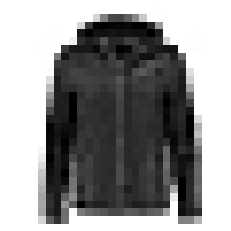

In [35]:
plt.imshow(X_train[0], cmap="binary")
plt.axis('off');

Las etiquetas van de 0 a 9, por lo que hay 10 tipos diferentes de ropa.

In [36]:
import numpy as np

In [37]:
np.unique(y_train)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

los nombres para cada una de las clases son: 

In [38]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

Entonces, la primera imagen en el conjunto de entrenamiento es un abrigo(Coat)

In [39]:
class_names[y_train[0]]

'Coat'

El conjunto de validación contiene 5,000 imágenes, y el conjunto de prueba contiene 10,000 imágenes:

In [40]:
X_valid.shape

(5000, 28, 28)

In [41]:
X_test.shape

(10000, 28, 28)

visualicemos ahora algunas de las imágenes de los datos de entrenamiento con su respectiva etiqueta

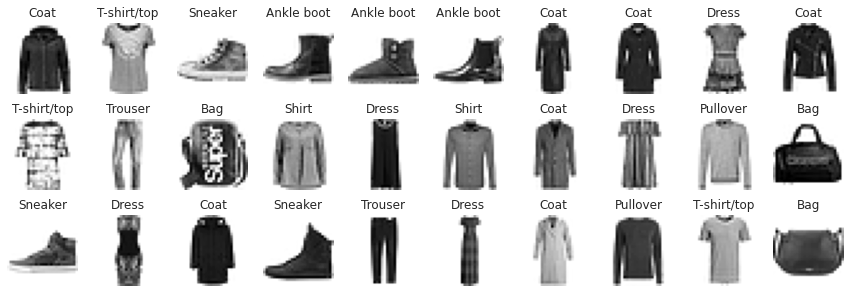

In [42]:
fig , ax =  plt.subplots(3,10, figsize=(15,5))
for i , ax in enumerate(ax.flat):
  ax.imshow(X_train[i], cmap='binary')
  ax.set_axis_off()
  ax.set_title(class_names[y_train[i]])

## Uso de Keras para crean un modelo de aprendizaje profundo 


In [43]:
keras.backend.clear_session()

In [44]:
model = keras.models.Sequential();
model.add(keras.layers.Flatten(input_shape=[28, 28]));
model.add(keras.layers.Dense(300, activation="relu"));
model.add(keras.layers.Dense(100, activation="relu"));
model.add(keras.layers.Dense(10, activation="softmax"));

Veamos este código línea por línea:
* La primera línea crea un modelo secuencial. Este es el tipo más simple de modelo para redes neuronales que están compuestas de una sola pila de capas, conectadas secuencialmente. Esto se llama la API secuencial.

* Luego , construimos la primera capa y la agregamos al modelo. Es una capa Flatten cuyo papel es simplemente convertir cada imagen de entrada en un arregle 1D:

* Luego, agregamos una capa oculta densa con 300 neuronas la cual utilizará la función de activación ReLU.

* Luego, agregamos una segunda capa oculta densa con 100 neuronas, que también utiliza la función de activación ReLU.

* Finalmente, agregamos una capa de salida densa con 10 neuronas (una por clase), usando la función de activación softmax (porque las clases son exclusivas).

El método `summary()` muestra un resumen de todas las capas del modelo.


In [45]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 300)               235500    
                                                                 
 dense_1 (Dense)             (None, 100)               30100     
                                                                 
 dense_2 (Dense)             (None, 10)                1010      
                                                                 
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


## Compilando el modelo

Después de crear un modelo, se debe llamar el método `compile()` para especificar la función de pérdida y el optimizador a utilizar. Opcionalmente, también puede especificar una lista de métricas  para calcular durante el entrenamiento y la evaluación:

In [46]:
model.compile(loss='sparse_categorical_crossentropy',
              optimizer='sgd', 
              metrics=["accuracy"])

## Entrenando y evaluando el modelo

Ahora el modelo está listo para ser entrenado. Para esto simplemente necesitamos llamar a su método `fit()`. Le pasamos las características de entrada (X_train) y las clases de destino (y_train), así como la cantidad de épocas para entrenar (o de lo contrario, sería predeterminado a solo 1). También pasamos un conjunto de validación (esto es opcional): Keras medirá la pérdida y las métricas adicionales en este conjunto al final de cada época, lo cual es muy útil para ver qué tan bien se desempeña realmente el modelo.

In [47]:
history =  model.fit(X_train, y_train, epochs=20, validation_data=(X_valid, y_valid))

Epoch 1/20
1719/1719 [==============================] - 10s 4ms/step - loss: 0.7244 - accuracy: 0.7618 - val_loss: 0.5193 - val_accuracy: 0.8244
Epoch 2/20
1719/1719 [==============================] - 6s 4ms/step - loss: 0.4855 - accuracy: 0.8314 - val_loss: 0.4393 - val_accuracy: 0.8530
Epoch 3/20
1719/1719 [==============================] - 6s 4ms/step - loss: 0.4400 - accuracy: 0.8452 - val_loss: 0.4130 - val_accuracy: 0.8644
Epoch 4/20
1719/1719 [==============================] - 6s 4ms/step - loss: 0.4128 - accuracy: 0.8549 - val_loss: 0.3887 - val_accuracy: 0.8694
Epoch 5/20
1719/1719 [==============================] - 7s 4ms/step - loss: 0.3928 - accuracy: 0.8614 - val_loss: 0.3751 - val_accuracy: 0.8690
Epoch 6/20
1719/1719 [==============================] - 6s 4ms/step - loss: 0.3778 - accuracy: 0.8660 - val_loss: 0.3776 - val_accuracy: 0.8698
Epoch 7/20
1719/1719 [==============================] - 7s 4ms/step - loss: 0.3630 - accuracy: 0.8711 - val_loss: 0.3792 - val_accuracy

¡Y eso es todo! La red neuronal está entrenada. En cada época durante el entrenamiento, Keras muestra el número de instancias procesadas hasta el momento (junto con una barra de progreso), el tiempo medio de entrenamiento, la pérdida (loss) y la precisión (accuracy), ambas calculadas en el conjunto de entrenamiento y el conjunto de validación.

El método `fit()` devuelve un objeto "History" que contiene los parámetros de entrenamiento (history.params), la lista de épocas por las que pasó (history.epoch) y, lo más importante, un diccionario (history.history) que contiene la pérdida y las métricas adicionales que midió al final de cada época en el conjunto de entrenamiento y en el conjunto de validación (si corresponde). 

usando la librería Pandas y matplotlib podemos visualizar las curvas de aprendizaje

In [48]:
import pandas as pd

In [49]:
df=pd.DataFrame(history.history)
df.head()

,loss,accuracy,val_loss,val_accuracy
0,0.724420,0.761800,0.519273,0.8244
1,0.485495,0.831400,0.439288,0.8530
2,0.440025,0.845164,0.413014,0.8644
3,0.412839,0.854855,0.388681,0.8694
4,0.392843,0.861382,0.375118,0.8690


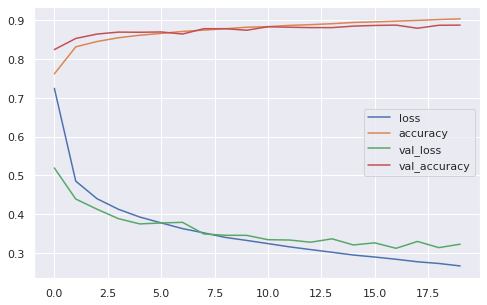

In [50]:
df.plot(figsize=(8, 5))

Se puede ver que tanto la precisión de entrenamiento como la de validación aumentan constantemente durante el entrenamiento, mientras que la pérdida de entrenamiento y validación disminuye. Ademas , las curvas de validación están bastante cerca de las curvas de entrenamiento, lo que significa que no hay demasiado sobreajuste(overfitting).

Ahora usemos el modelo ya entrenado sobre nuestros datos de prueba (X_test)

In [51]:
model.evaluate(X_test,y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.3491 - accuracy: 0.8775


[0.34907838702201843, 0.8774999976158142]

## Usando el modelo para hacer predicciones

Ahora, podemos usar el método `predict()` para hacer predicciones sobre nuevas instancias. Como no tenemos instancias nuevas reales, solo usaremos las primeras 3 instancias del conjunto de prueba:

In [81]:
X_new = X_test[:5]
y_proba = model.predict(X_new)
y_proba.round(2)

array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.01, 0.  , 0.13, 0.  , 0.86],
       [0.  , 0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.19, 0.  , 0.01, 0.  , 0.  , 0.  , 0.8 , 0.  , 0.  , 0.  ]],
      dtype=float32)

Como puede ver, para cada caso, el modelo estima una probabilidad por clase, desde la clase 0 hasta la clase 9. Si solo le importa la clase con la probabilidad estimada más alta (incluso si esa probabilidad es bastante baja), puede usar el método  `np.argmax()` en su lugar

In [76]:
x=np.argmax(y_proba,axis=1)
print(class_names[int(x[0])])

Ankle boot


In [78]:
y_new = y_test[:5]
y_new

array([9, 2, 1, 1, 6], dtype=uint8)

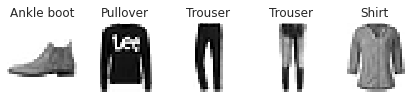

In [82]:
plt.figure(figsize=(7.2, 2.4))
for index, image in enumerate(X_new):
    plt.subplot(1, 5, index + 1)
    plt.imshow(image, cmap="binary", interpolation="nearest")
    plt.axis('off')
    plt.title(class_names[y_test[index]], fontsize=12)

## Reto Opcional

Suba una imagen propia y haga una predicción usando el modelo entrenado

Haga click **aquí** si tiene problemas con la solución:

<!-----
from google.colab import files
uploaded = files.upload()
#Usando OpenCV
import cv2
data = cv2.imread("img.jpg",cv2.IMREAD_GRAYSCALE)
data = cv2.resize(data,(28,28))
#Predecir
y_pred = model.predict(X_new.reshape(1,28,28))
----->